16:40:00 - cmdstanpy - INFO - Chain [1] start processing


        city         ds      y
0  Ahmedabad 2019-04-22  70.32
1  Ahmedabad 2019-04-22  70.32
2  Ahmedabad 2019-04-22  70.32
3  Ahmedabad 2019-04-22  70.32
4  Ahmedabad 2019-04-22  70.32


16:40:00 - cmdstanpy - INFO - Chain [1] done processing


            ds       yhat  yhat_lower  yhat_upper
662 2022-02-17  93.939277   92.812123   95.163268
663 2022-02-18  93.908702   92.765716   95.133570
664 2022-02-19  93.950942   92.664307   95.146862
665 2022-02-20  93.888555   92.722810   95.069794
666 2022-02-21  93.739828   92.564310   95.019017
667 2022-02-22  93.852409   92.595552   95.197173
668 2022-02-23  93.804884   92.570662   95.090442
669 2022-02-24  93.605102   92.399910   94.978205
670 2022-02-25  93.507915   92.189931   94.884690
671 2022-02-26  93.484784   92.290744   94.802184


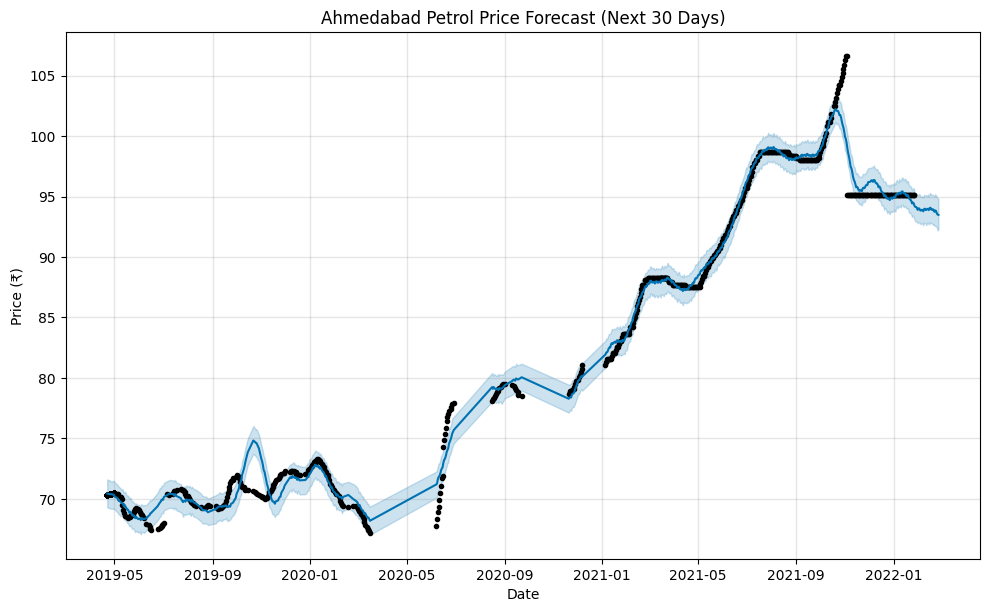

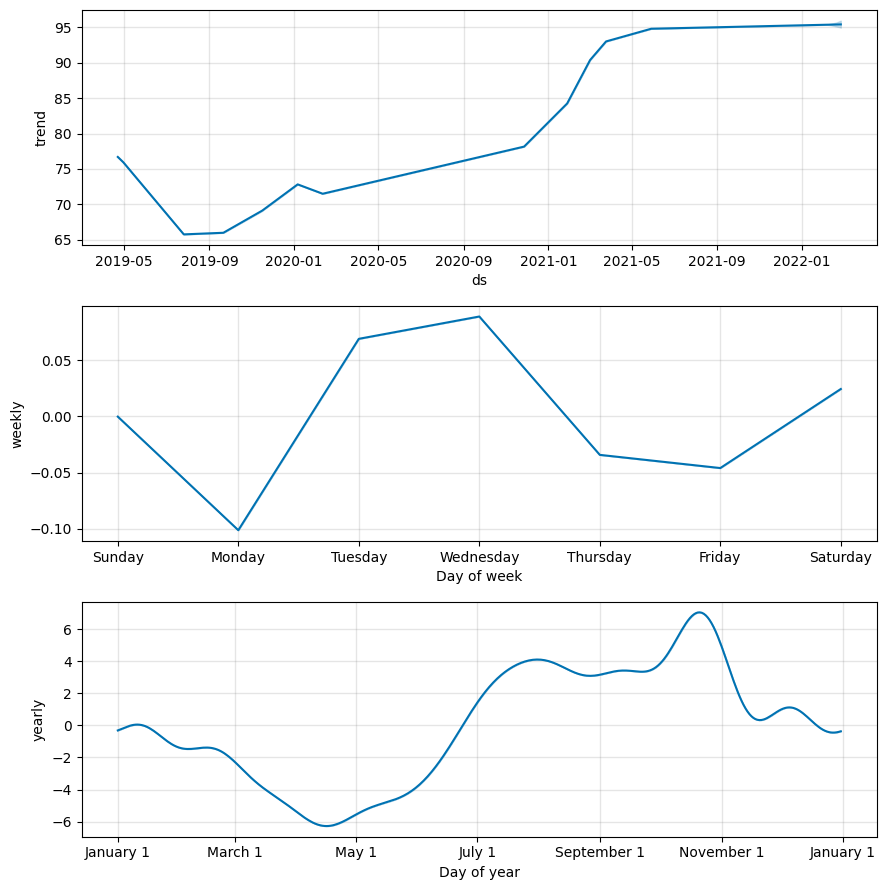

✅ Forecast saved to Ahmedabad_petrol_forecast.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

file_path = r"D:\DS Projects\Petrol price prediction\Petrol price.csv"
df = pd.read_csv(file_path)

# Standardize columns
df.columns = df.columns.str.strip().str.lower()

# Keep Ahmedabad data only
df = df[df['city'].str.lower() == 'ahmedabad']

# Rename for Prophet
df = df.rename(columns={'date': 'ds', 'rate': 'y'})
df['ds'] = pd.to_datetime(df['ds'])

print(df.head())

model = Prophet(daily_seasonality=False, yearly_seasonality=True)
model.fit(df)

future = model.make_future_dataframe(periods=30)  # 30 days ahead
forecast = model.predict(future)

# Show last 20 forecasted days
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(10))

fig1 = model.plot(forecast)
plt.title("Ahmedabad Petrol Price Forecast (Next 30 Days)")
plt.xlabel("Date")
plt.ylabel("Price (₹)")
plt.show()

fig2 = model.plot_components(forecast)  # trend + seasonality
plt.show()

forecast.to_csv("Ahmedabad_petrol_forecast.csv", index=False)
print("✅ Forecast saved to Ahmedabad_petrol_forecast.csv")
